# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
# TODO  -- There are 400 rows in our dataset.
len(df)

400

Answer: TODO

> ### Question 2.  Create a summary table.

In [8]:
# TODO
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [ ]:
# TODO
# The range of values for GPA is 2.26 to 4, whereas the range of values for GRE is 220 to 800.  
# Because the range of values for GRE is over 100 times greater than that for GPA, 
# the variance for GRE is greater than that for GPA.


Answer: TODO

> ### Question 4.  Drop data points with missing data.

In [17]:
# TODO
df[df.gpa.isnull()]  # rows 187, 236
df[df.gre.isnull()]  # rows 187, 212
df[df.prestige.isnull()]  # row 236  
df=df.dropna()  # dropped 3 rows, 187, 212, 236

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [20]:
# TODO
# df[df.gpa.isnull()]  # rows 187, 236  -- now empty
# df[df.gre.isnull()]  # rows 187, 212  -- now empty
df[df.prestige.isnull()]  # row 236    -- now empty

,admit,gre,gpa,prestige


Answer: TODO

> ### Question 6.  Create boxplots for `gre` and `gpa`.

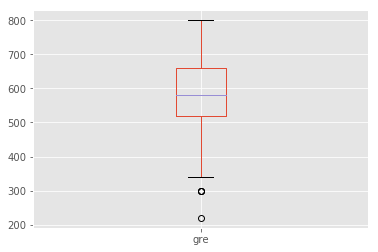

In [22]:
# TODO  box plot for GRE
df[['gre']].plot(kind='box')

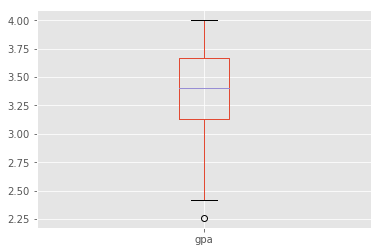

In [23]:
# TODO  box plot for GPA
df[['gpa']].plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: The boxplots show that there are some outliers (2 very low GRE scores and 1 very low GPA).

> ### Question 8.  Plot the distribution of each variable.

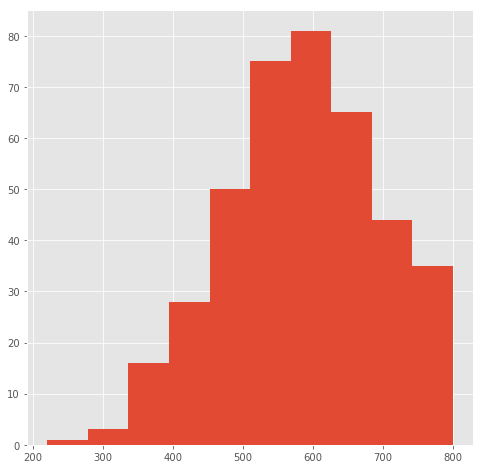

In [5]:
# TODO
df.gre.hist(figsize = (8, 8))

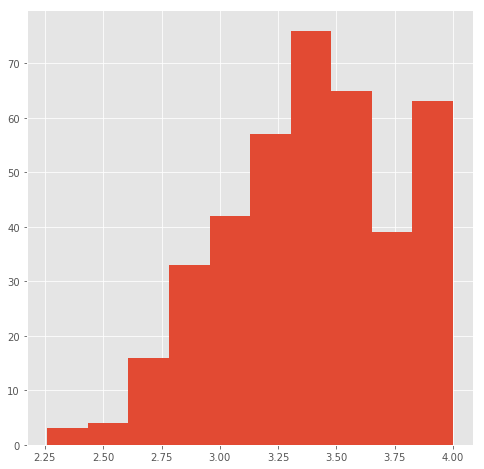

In [6]:
# TODO
df.gpa.hist(figsize = (8, 8))


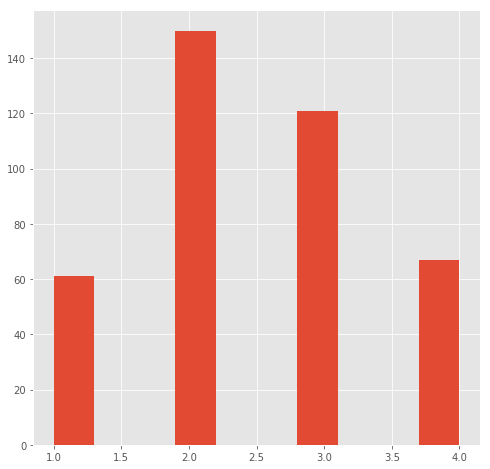

In [7]:
# TODO
df.prestige.hist(figsize = (8, 8))


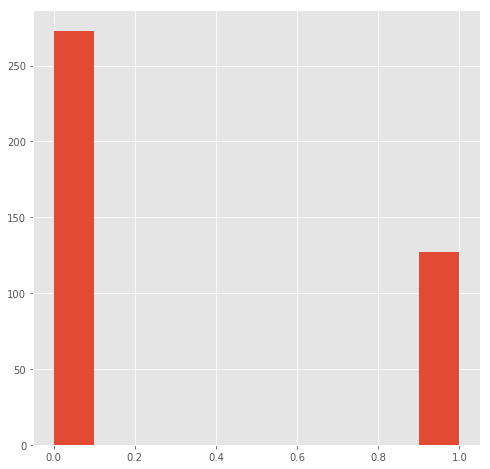

In [8]:
# TODO
df.admit.hist(figsize = (8, 8))


> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [13]:
# TODO  The distribution of GRE is skewed to the right, that is, the median is lower than the average.
df.gre.median()   # 580
df.gre.mean()  # 588.04
#We would need to choose a distrbution whose median is lower than the average.

580.0

In [18]:
## TODO  The distribution of GPA is bi-modal, that is, there are two high points at 4.0 and at 3.4.
df.gpa.median()   # 3.395
df.gpa.mean()  # 3.391
#We would need to choose a distrbution that is bi-modal.  Most classical distributions are not bi-model.

3.3909296482412077

Answer: TODO

> ### Question 10.  Create a correlation matrix for the dataset.

In [19]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

In [ ]:
# Answer: TODO
The variables do not appear to be very co-linear.  GPA and GRE are the most related.
The correlation between admit and prestige is negative, so that as prestige increases, admit decreases.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

In [ ]:
# Answer: TODO
First we check for outliers, but there are no outliers in admit or prestige.
We could then create a scatter plot to see if there is any relationshis, visually.  
Based upon what we see in the scatter plot, we may want to try to predict admit 
based on GRE and GPA separately for each prestige category.

> ### Question 13.  What is your hypothesis?

Answer: 
My hypothesis is that the we would be able to predit admit rates based on GRE and GPA when controlling for prestige.